<a href="https://colab.research.google.com/github/MaureenGatu/State-of-financial-inclusion-in-Kenya-Rwanda-Tanzania-and-Uganda/blob/main/FINANCIAL_SCOPE_EAST_AFRICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**State of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda**






#RESEARCH QUESTION

> The aim of this research is to analyze the data and determine the characteristics of people that are more likely to have a bank account by looking at the characteristics of the respondents in the study with a bank account.

The main research question will be:

> What are the main and common characteristics of persons with a bamk account?
> What factors influence whether a person has a bank account?









##Metric for Success


> A successful analysis will provide definitive facters that influence a person to have a bank account


##Understanding the Context


> Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth



##Recording the Experimental Design

1.   Define research question
2.   Data Exploration
3.   Univariate analysis
4.   Bivariate Analysis
5.   Multivariate Analysis
6.   Summary of Findings
7.   Challenging the solution




#**Data Exploration**

In [ ]:
#importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#setting
plt.rcParams['figure.figsize'] = (8.0,6.0) 
sns.set()
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
colors = ['purple','green']



In [ ]:
#uploading the datasets
#variable description dataset
definations = pd.read_csv('http://bit.ly/VariableDefinitions')

#preview of the variable definations
definations

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
#uploading the dataset to be analysed
fin = pd.read_csv('http://bit.ly/FinancialDataset')

#previewing the first 5 rows of the dataset
print('TOP 5 ROWS')
print(' ')
print(fin.head(5))
print(' ')
print('.......'*40)

#preview of the last 5 rows of the dataset
print('BOTTOM ROWS')
print(' ')
print(fin.tail(5))

TOP 5 ROWS
 
  country  year    uniqueid Has a Bank account Type of Location Cell Phone Access  household_size  Respondent Age gender_of_respondent The relathip with head           marital_status              Level of Educuation                Type of Job
0   Kenya  2018  uniqueid_1                Yes            Rural               Yes             3.0            24.0               Female                 Spouse  Married/Living together              Secondary education              Self employed
1   Kenya  2018  uniqueid_2                 No            Rural                No             5.0            70.0               Female      Head of Household                  Widowed              No formal education       Government Dependent
2   Kenya  2018  uniqueid_3                Yes            Urban               Yes             5.0            26.0                 Male         Other relative     Single/Never Married  Vocational/Specialised training              Self employed
3   Kenya  2018

In [ ]:
#checking the data types and shape of the dataset
fin.info()
print(' ')
print('....'*30)
print('SHAPE')
fin.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB
 
...............................

(23524, 13)

In [ ]:
#cheking for duplicates and missing values in the dataset
print('DUPLICATES')
print(fin.duplicated().sum())
print(' ')
print('...'*30)
print('NUMBER OF NULL VALUES')
print(' ')
fin.isnull().sum()

DUPLICATES
0
 
..........................................................................................
NUMBER OF NULL VALUES
 


country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
#Dropping all the null values
fin.dropna(inplace=True)

#confirming the the nulls were dropped
print('NUMBER OF NULL VALUES')
print(' ')
print(fin.isnull().sum())
print(' ')
print('....'*30)

#Checking the new shape of the dataset
print('NEW SHAPE')
fin.shape

NUMBER OF NULL VALUES
 
country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64
 
........................................................................................................................
NEW SHAPE


(23343, 13)

In [ ]:
# Renaming the misspelt column name
fin.rename(columns={'Level of Educuation':'Level_of_Education'})

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level_of_Education,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
#checking the data entries

#year 
print('year')
print(fin['year'].unique())
print(' ')
print('Level of Education')
print(fin['Level of Educuation'].unique())

year
[2018 2029 2056 2016 2039 2017]
 
Level of Education
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6']


In [ ]:
#Looking up the annomalies
print('year annomalies')
print(fin[fin['year'].isin([2029,2056,2039])])
print(' ')
print('...'*40)
print('Education Annomaly')
print(' ')
print(fin[fin['Level of Educuation']=='6'])

year annomalies
     country  year      uniqueid Has a Bank account Type of Location Cell Phone Access  household_size  Respondent Age gender_of_respondent The relathip with head           marital_status  Level of Educuation                Type of Job
213    Kenya  2029  uniqueid_214                 No            Urban               Yes             6.0            16.0                 Male         Other relative     Single/Never Married  Secondary education       Remittance Dependent
308    Kenya  2056  uniqueid_309                Yes            Urban               Yes             4.0            40.0                 Male      Head of Household  Married/Living together   Tertiary education  Formally employed Private
7014  Rwanda  2039  uniqueid_947                 No            Rural               Yes             3.0            24.0               Female                 Spouse  Married/Living together    Primary education        Informally employed
 
......................................

In [ ]:
#dropping the rows with the annomalies
odd = fin[fin['year'].isin([2029,2056,2039])].index
fin.drop(index=odd, inplace=True)

In [ ]:
#drop any row with 'nan' entry
j = fin[fin['household_size'].isin(['nan'])].index
fin.drop(index=j, inplace=True)
fin['The relathip with head'].unique()
j = fin[fin['Type of Location'].isin(['nan'])].index
fin.drop(index=j, inplace=True)
j = fin[fin['Respondent Age'].isin(['nan'])].index
fin.drop(index=j, inplace=True)
j = fin[fin['The relathip with head'].isin(['nan'])].index
fin.drop(index=j, inplace=True)


In [ ]:
#checking the new shape of our data
fin.shape

(23340, 13)

In [ ]:
# removing outliers
Q1=fin.quantile(0.25)
Q3=fin.quantile(0.75)
IQR=Q3-Q1
fin=fin[~((fin<(Q1-1.5*IQR))|(fin>(Q3+1.5*IQR))).any(axis=1)]

##EXPLORATORY DATA ANALYSIS

###UNIVARIATE ANALYSIS

In [ ]:
#Data describe of the age, year and householde size

fin.describe()

,year,household_size,Respondent Age
count,22725.000000,22725.000000,22725.000000
mean,2016.968185,3.579846,38.347987
std,0.846366,2.080542,15.806141
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,9.000000,83.000000


####Measures Of Central Tendancies

In [ ]:
#creating sub dataset of those with and those without bank account
#.........................
#activie
print('WITH BANK')
withbank = fin[fin['Has a Bank account']=='Yes']
print(withbank.head(5))
print('  ')
print('SHAPE')
print(withbank.shape)

#.................................
print('....'*20)
print('  ')
print('WITHOUT BANK')


#............................
withoutbank = fin[fin['Has a Bank account']=='No']
print(withoutbank.head(5))
print('  ')
print('SHAPE')
print(withoutbank.shape)

WITH BANK
   country  year     uniqueid Has a Bank account Type of Location Cell Phone Access  household_size  Respondent Age gender_of_respondent The relathip with head           marital_status              Level of Educuation          Type of Job
0    Kenya  2018   uniqueid_1                Yes            Rural               Yes             3.0            24.0               Female                 Spouse  Married/Living together              Secondary education        Self employed
2    Kenya  2018   uniqueid_3                Yes            Urban               Yes             5.0            26.0                 Male         Other relative     Single/Never Married  Vocational/Specialised training        Self employed
8    Kenya  2018   uniqueid_9                Yes            Rural               Yes             3.0            54.0                 Male      Head of Household  Married/Living together              Secondary education  Farming and Fishing
11   Kenya  2018  uniqueid_12     

In [ ]:
#age
print(f"Age meam     :{fin['Respondent Age'].mean()}")
print(f"Age median   :{fin['Respondent Age'].median()}")
print(f"Age max     :{fin['Respondent Age'].max()}")
print(f"Age min     :{fin['Respondent Age'].min()}")
print(f"Age mode     :{fin['Respondent Age'].mode()}")

Age meam     :38.34798679867987
Age median   :35.0
Age max     :83.0
Age min     :16.0
Age mode     :0    30.0
dtype: float64


In [ ]:
#household size
print(f"household_size meam     :{fin['household_size'].mean()}")
print(f"household_size median   :{fin['household_size'].median()}")
print(f"household_size max     :{fin['household_size'].max()}")
print(f"household_size min     :{fin['household_size'].min()}")
print(f"household_size mode     :{fin['household_size'].mode()}")

household_size meam     :3.57984598459846
household_size median   :3.0
household_size max     :9.0
household_size min     :0.0
household_size mode     :0    2.0
dtype: float64


####Measures of Despersion

In [ ]:
#FREQUENCY ANALYSIS
freq = withbank.select_dtypes(include='object').columns.to_list()
for col in freq:
  print(f'Frequency: {col}')
  print(withbank[col].value_counts().sort_values(ascending=False))
  print(' ')


Frequency: country
Kenya       1491
Rwanda       980
Tanzania     598
Uganda       166
Name: country, dtype: int64
 
Frequency: uniqueid
uniqueid_719     4
uniqueid_4619    3
uniqueid_1228    3
uniqueid_4579    3
uniqueid_3938    3
                ..
uniqueid_3806    1
uniqueid_4300    1
uniqueid_3127    1
uniqueid_70      1
uniqueid_1499    1
Name: uniqueid, Length: 2801, dtype: int64
 
Frequency: Has a Bank account
Yes    3235
Name: Has a Bank account, dtype: int64
 
Frequency: Type of Location
Urban    1620
Rural    1615
Name: Type of Location, dtype: int64
 
Frequency: Cell Phone Access
Yes    3142
No       93
Name: Cell Phone Access, dtype: int64
 
Frequency: gender_of_respondent
Male      1782
Female    1453
Name: gender_of_respondent, dtype: int64
 
Frequency: The relathip with head
Head of Household      2221
Spouse                  688
Child                   185
Other relative           64
Parent                   58
Other non-relatives      19
Name: The relathip with head, d

In [ ]:
#skewness and Kurtosis
print('Respondent age')
print(f'skewness:  {withbank["Respondent Age"].skew()}')
print(f'Kurtosis:  {withbank["Respondent Age"].kurt()}')
print(' ')
print('household size')
print(f'skewness:  {withbank["household_size"].skew()}')
print(f'Kurtosis:  {withbank["household_size"].kurt()}')

Respondent age
skewness:  0.868814039800211
Kurtosis:  0.19470303083680562
 
household size
skewness:  0.5871120210067629
Kurtosis:  -0.4947172475287682


repondent age and the house hold size are both positively skewed. Both respondent age and household size are platykurtic(both are less thatn zero) meanin they are right tailed.

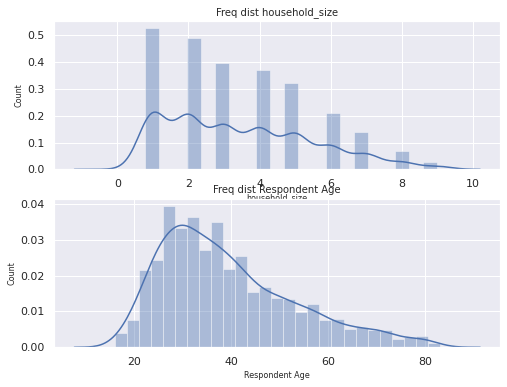

In [ ]:
#distribution plots
col_names =['household_size','Respondent Age']
fig, ax = plt.subplots(len(col_names), figsize=(8,6))

for i, col_val in enumerate(col_names):

    sns.distplot(withbank[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8);

##Bivariate analysis

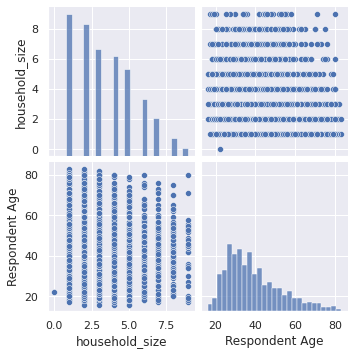

In [ ]:
# Ploting the bivariate summaries and recording our observation
withbank = withbank.drop([
      'year'
], axis=1)

sns.pairplot(withbank)

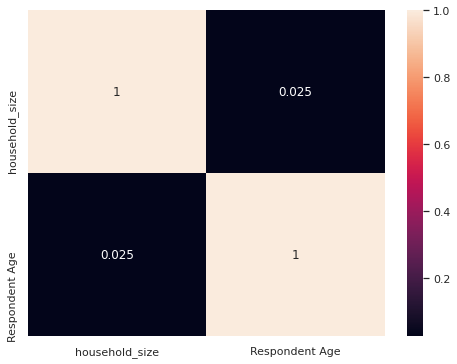

In [ ]:
sns.heatmap(withbank.corr(),annot=True)
plt.show()

> There is a very low but positve correlation between household size and age of respondent



####**Using crosstabulation for analysis**

All variables are correlated to having a bank account.
> Hypothesis

> NULL: There is no correlation between the variable being tested and having a bank account

> ALTERNATIVE: There is  a correlation between the variable being tested and having a bank account.

If the p-value is smaller that the alpha, we reject the null hypothesis. If the p-vale is larger than the alpha we do not reject the null hypothesis.





In [ ]:
# Is there a correlation between type of job and if the respondent has a bank account or not
jobtype = pd.crosstab(fin['Has a Bank account'], fin['Type of Job'])
jobtype

Type of Job,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
Has a Bank account,,,,,,,,,,
No,104,4676,85,471,168,5052,572,843,2145,5374
Yes,14,620,297,564,41,438,13,183,230,835


In [ ]:
#testing the correlation using chisquare
stat, p, dof, expected = chi2_contingency(jobtype.to_numpy())
 
#Using significance level = 0.05(95% confidence interval)
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Alpha:             {1-prob}')
print(f'p-value:            {p}')

Alpha:             0.050000000000000044
p-value:            0.0


> Reject Null Hypothesis


In [ ]:
# Is there a correlation between type of job and if the respondent has Cell Phone Access or not
cell = pd.crosstab(fin['Has a Bank account'], fin['Cell Phone Access'])
cell

Cell Phone Access,No,Yes
Has a Bank account,,
No,5647,13843
Yes,93,3142


In [ ]:
#testing the correlation using chisquare
stat, p, dof, expected = chi2_contingency(cell.to_numpy())
 
#Using significance level = 0.05(95% confidence interval)
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Alpha:             {1-prob}')
print(f'p-value:            {p}')

Alpha:             0.050000000000000044
p-value:            2.1072822212732086e-219


> Reject Null Hypothesis



In [ ]:
# Is there a correlation between type of job and if the respondent marital_status
status = pd.crosstab(fin['Has a Bank account'], fin['marital_status'])
#testing the correlation using chisquare
stat, p, dof, expected = chi2_contingency(status.to_numpy())
 
#Using significance level = 0.05(95% confidence interval)
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Alpha:             {1-prob}')
print(f'p-value:            {p}')

Alpha:             0.050000000000000044
p-value:            4.987040663302468e-39




> Reject Null Hypothesis



In [ ]:
# Is there a correlation between type of job and if the respondent Level of Educuation
education = pd.crosstab(fin['Has a Bank account'], fin['Level of Educuation'])
#testing the correlation using chisquare
stat, p, dof, expected = chi2_contingency(education.to_numpy())
 
#Using significance level = 0.05(95% confidence interval)
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Alpha:             {1-prob}')
print(f'p-value:            {p}')

Alpha:             0.050000000000000044
p-value:            0.0




> Reject Null Hypothesis



In [ ]:
# Is there a correlation between type of job and if the respondent Respondent Age
age = pd.crosstab(fin['Has a Bank account'], fin['Respondent Age'])
#testing the correlation using chisquare
stat, p, dof, expected = chi2_contingency(age.to_numpy())
 
#Using significance level = 0.05(95% confidence interval)
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Alpha:             {1-prob}')
print(f'p-value:            {p}')

Alpha:             0.050000000000000044
p-value:            3.9042668083416926e-56




>Reject Null Hypothesis 



In [ ]:
# Is there a correlation between type of job and if the respondent Respondent Location
location = pd.crosstab(fin['Has a Bank account'], fin['Type of Location'])
#testing the correlation using chisquare
stat, p, dof, expected = chi2_contingency(location.to_numpy())
 
#Using significance level = 0.05(95% confidence interval)
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Alpha:             {1-prob}')
print(f'p-value:            {p}')

Alpha:             0.050000000000000044
p-value:            2.846901481187161e-42


Reject Null Hypothesis

Text(0.5, 1.0, 'Respondent The relatioship with head')

<Figure size 1080x288 with 0 Axes>

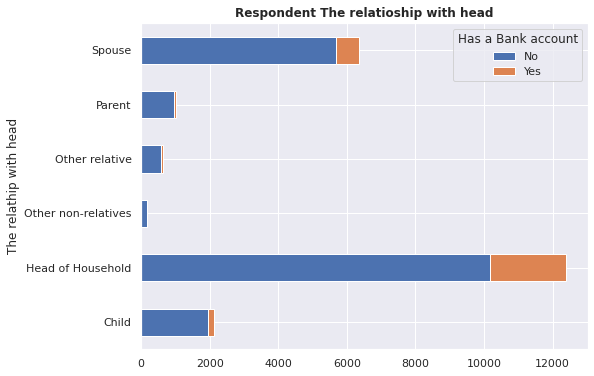

In [ ]:
#Visualization
plt.figure(figsize=(15, 4))

fin.groupby('The relathip with head')['Has a Bank account'].value_counts().unstack().plot.barh(stacked=True)
plt.title('Respondent The relatioship with head', weight = 'heavy')

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text major ticklabel objects>)

<Figure size 1080x288 with 0 Axes>

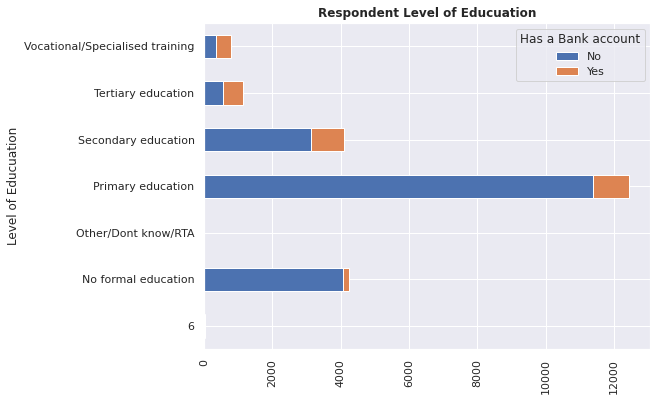

In [ ]:
#level of education visualization
plt.figure(figsize=(15, 4))

fin.groupby('Level of Educuation')['Has a Bank account'].value_counts().unstack().plot.barh(stacked=True)
plt.title('Respondent Level of Educuation', weight = 'heavy')
plt.xticks(rotation = 90)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text major ticklabel objects>)

<Figure size 1080x288 with 0 Axes>

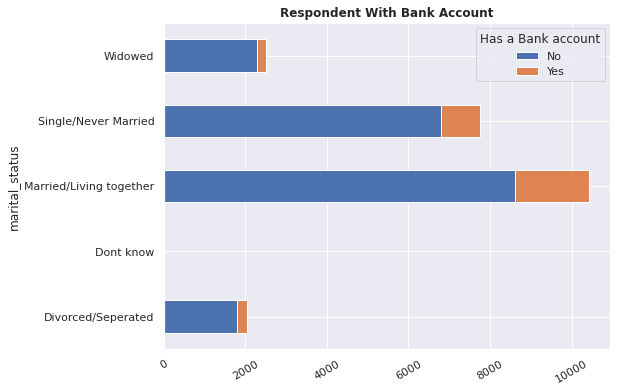

In [ ]:
#Marital Status visualization
plt.figure(figsize=(15, 4))
fin.groupby('marital_status')['Has a Bank account'].value_counts().unstack().plot.barh(stacked=True)
plt.title('Respondent With Bank Account', weight = 'heavy')
plt.xticks(rotation = 30)

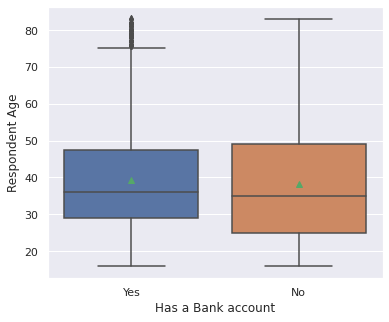

In [233]:
#box plot agevs bank account
plt.figure(figsize=(6,5))
sns.boxplot(x = 'Has a Bank account', y = 'Respondent Age', data=fin,showmeans=True)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

<Figure size 1080x288 with 0 Axes>

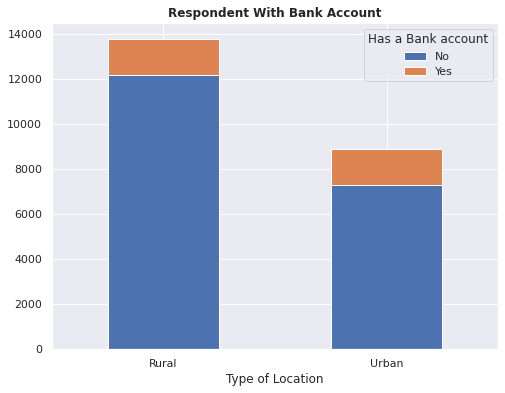

In [ ]:
#Type of Location visualization
plt.figure(figsize=(15, 4))

fin.groupby('Type of Location')['Has a Bank account'].value_counts().unstack().plot.bar(stacked=True)
plt.title('Respondent With Bank Account', weight = 'heavy')
plt.xticks(rotation = 0)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

<Figure size 1080x288 with 0 Axes>

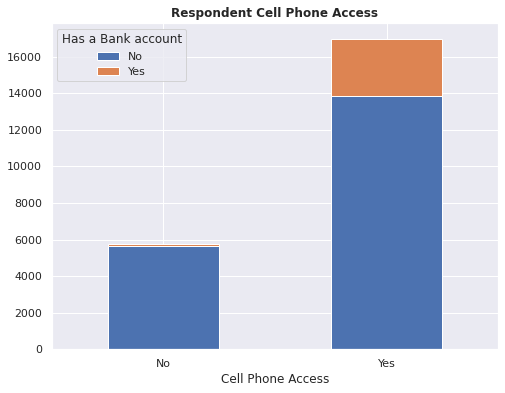

In [ ]:
#Cell Phone Access visualization
plt.figure(figsize=(15, 4))

fin.groupby('Cell Phone Access')['Has a Bank account'].value_counts().unstack().plot.bar(stacked=True)
plt.title('Respondent Cell Phone Access', weight = 'heavy')
plt.xticks(rotation= 0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

<Figure size 1080x288 with 0 Axes>

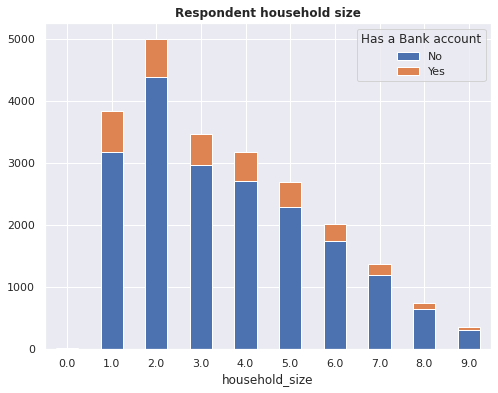

In [ ]:
#household_size visualization
plt.figure(figsize=(15, 4))

fin.groupby('household_size')['Has a Bank account'].value_counts().unstack().plot.bar(stacked=True)
plt.title('Respondent household size', weight = 'heavy')
plt.xticks(rotation= 0)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

<Figure size 1080x288 with 0 Axes>

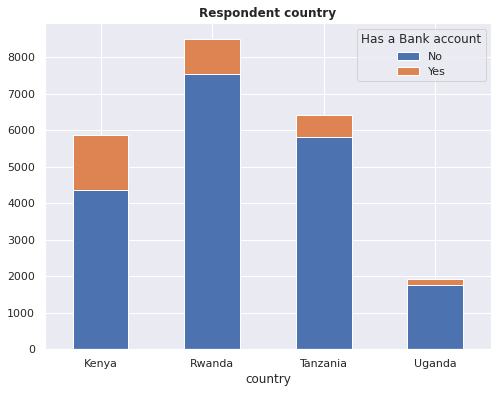

In [ ]:
#country visualization
plt.figure(figsize=(15, 4))

fin.groupby('country')['Has a Bank account'].value_counts().unstack().plot.bar(stacked=True)
plt.title('Respondent country', weight = 'heavy')
plt.xticks(rotation= 0)

###Multivariete Analysis

In [ ]:
# Encode categorical features
df = fin.drop('Has a Bank account', axis=1)

#Convert year variable to object
df['year'] = df['year'].astype('object')

# Get categorical codes for categorical columns
categorical_columns = ['country', 'year', 'Type of Location','Cell Phone Access', 'gender_of_respondent', 'The relathip with head', 'marital_status', 'Level of Educuation','Type of Job']

for col in categorical_columns:
  df[col] = df[col].astype('category').cat.codes

In [ ]:
#preview the dataset and set uniqueid as the index
df = df.set_index('uniqueid')
df.head(5)

,country,year,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
uniqueid,,,,,,,,,,,
uniqueid_1,0,2,0,1,3.0,24.0,0,5,2,4,9
uniqueid_2,0,2,0,0,5.0,70.0,0,1,4,1,4
uniqueid_3,0,2,1,1,5.0,26.0,1,3,3,6,9
uniqueid_4,0,2,0,1,5.0,34.0,0,1,2,3,3
uniqueid_5,0,2,1,0,8.0,26.0,1,0,3,3,5


In [ ]:
#defining x and y
X = df.drop('Level of Educuation', 1)
y = df['Level of Educuation']

In [ ]:
#Splitting the dataset into the Training set and Test set

#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Normalization

# We will perform standard scalar normalization to normalize our feature set. 


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Applying PCA

df['household_size'] = df['household_size'].apply(np.int64)
df['Respondent Age'] = df['Respondent Age'].apply(np.int64)
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_



# first principal component is responsible for 20.06% variance. 
# Similarly, the second principal component causes 15.62variance in the dataset. 
# Collectively we can say that (20.06 + 15.62+11.14%) 46.82% percent of the classification information contained 
# in the feature set is captured by the first two principal components.
explained_variance

array([0.20062372, 0.15618715, 0.1301582 , 0.11137863, 0.09035956,
       0.08204183, 0.07343546, 0.06503047, 0.04882948, 0.04195551])

In [ ]:
# Using 1 Principal Component
# 
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Training and Making Predictions - Random Forest
.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

#eando forest has a 54.32% level of accuracy using 1 PCA

[[   0    0    0    4    0    0    0]
 [   0    0    0  864    0    0    0]
 [   0    0    0    3    0    0    0]
 [   0    0    0 2469    0    0    0]
 [   0    0    0  806    0    0    0]
 [   0    0    0  242    0    0    0]
 [   0    0    0  157    0    0    0]]
Accuracy 0.5432343234323432


#**CONCLUSION**

The proportion of individuals with no bank accounts is extremely high in comparison to those with that have a bank account.

The respondent characteristics such as locaion, job type, age, level of education as well as accesss to a cellphone having a significant impact on whether an individual has an account or not.

most of the repondent with bank accouns were:
      Male
      Head of the household
      self Employed
      Married/Living with partner
      Primary School level of education
      In Kenya
      had cellphone access
The number of respondents with bank account in rural areas were almost equal to those in the urban areas.

The random forest prediction model at the 1st PCA had a 54.32 leve of accurancy.

